# Algorithme KMeans très simplifié

/!\ Attention : le code a ensuite été exporté dans un fichier kmean.py et modifié sur VSCode - ce code n'est pas à jour

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.datasets import make_blobs
import math

## On génère un jeu de données

In [174]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2,random_state=0)

## On crée des petits morceaux de code pour toutes les étapes nécessaire à l'algorithme KMeans (et on les met toutes dans une classe KMeans comme dans sklearn) 

In [175]:
class KMeans:
    def __init__(self, k):
        self.k=k
        self.n_init=10 # number of random initializations = 10. Peut être changé avec instance(ex : kmean_clf.n_init=2)
    
    # On attribue des coordonnées aléatoires aux centroids qu'on veut
    
    def coord_aleatoires_centroids(X,k):
        '''On génère des coordonnées de centroïds aléatoires'''
        coords_centroids={}
        for i in range(k):
            coords_centroids[i]=(np.random.choice(X[:,0], 1,replace=False),np.random.choice(X[:,1], 1,replace=False))
        return coords_centroids
    
    # On attribue un cluster à chaque observation de X

    def calculateDistance(x1,y1,x2,y2):
        """fonction pour calculer la distance entre 2 points"""
        dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        return dist
    
    def prediction_y(X):
        ''' On attribue à chaque observation de X un cluster dans un array y_pred'''
        y_pred=[]
        for row in X:
            dist_aux_centroids={}
            for key in coords_centroids: #on calcule la distance de l'observation aux 3 centroids
                dist_aux_centroids[key]=calculateDistance(row[0],row[1],coords_centroids[key][0],coords_centroids[key][1])

            # on stocke la prédiction du cluster de l'observation dans un numpy array
            for key,value in dist_aux_centroids.items(): # on récupère le centroid le plus proche
                if value == min(dist_aux_centroids[0],dist_aux_centroids[1],dist_aux_centroids[2]):
                    y_pred.append(key)
        return y_pred
    
    # On place les centroids au centre des clusters
    
    def centroids_deplaces_centre_clusters(X,y_pred,coords_centroids):
        """Déplace chaque centroid au centre de son cluster"""

        # on concatène les observations X avec leur prédiction y dans un dataframe
        concat_X_ypred=np.column_stack((X, y_pred))
        concat_X_ypred=pd.DataFrame(concat_X_ypred,columns=['X0','X1','y_pred'])

        # on convertit les y_pred (float) en int
        concat_X_ypred.y_pred=pd.to_numeric(concat_X_ypred.y_pred, downcast="integer")

        # on remplace les coordonnées précédentes des centroids par les coordonnées du centre de chaque cluster
        for key in coords_centroids:
            coords_centroids[key]=(concat_X_ypred[y_pred==key].mean().X0,concat_X_ypred[y_pred==key].mean().X1)
        return coords_centroids
            
    def fit_predict(self,X_train):
        coord_aleatoires_centroids(X,k)
        for i in range(10):
            prediction_y(X)
            centroids_deplaces_centre_clusters(X,y_pred,coords_centroids)
        return coords_centroids,y_pred

In [170]:
# Pour plotter le jeu de données et les centroïds générés

def plot_clusters_centroids(X,y_pred,coords_centroids):
    '''Visualisation des clusters et des centroids en 2D avec le jeu de données'''
    plt.scatter(X[:, 0], X[:, 1], c=y_pred,s=10)
    for key in coords_centroids:
        plt.plot(coords_centroids[key][0],coords_centroids[key][1],marker='o',color="red",label='centroid')

## On teste le code sur un jeu de données

In [176]:
kmeans=KMeans(k=3)

In [177]:
coords_centroids,y_pred=kmeans.fit_predict(X)

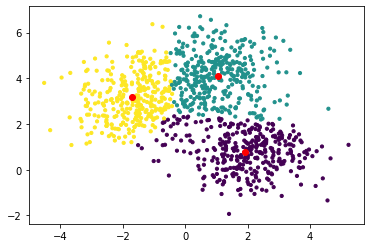

In [171]:
plot_clusters_centroids(X,y_pred,coords_centroids)

In [190]:
donnees=[0,1,2,3,4,5,6,7,8,9]
class test:
    def __init__(self,k):
        self.k=k
    def method_a(self,info,k):
        print(info)
    def method_b(self,donnees):
        print("this is a test:")
        self.method_a(donnees,self.k)

In [191]:
test1=test(k=2)

In [192]:
test1.method_b(donnees)

this is a test:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
